In [1]:
import matplotlib.pylab as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import Estimation as st
import tables as tb
from Histogram import Histogram as hist
from PDF import PDF
from Utils import IsotopeDic, PartDic
from scipy.stats import poisson
import scipy.optimize as sop
import numpy as np
from scipy.special import gamma
#from Fits import Fit

In [167]:
# %load ../Code/Fits.py
import Estimation as st
from Histogram import Histogram as hist
from PDF import PDF
from Utils import IsotopeDic, PartDic
from scipy.stats import poisson
import scipy.optimize as sop
import numpy as np
from scipy.special import gamma
from copy import copy

def generalLogPoisson(x,mu):
    return -mu+x*np.log(mu+0.001)-(x+1)*np.log((x+1))+(x+1)


class Fit():
    '''
    Class meant to perform the fit
    '''
    def __init__(self, E, spectrum, PDFs):
        '''
        E: x range (np array)
        spectrum: experimental points
        PDF: list of spectra PDFs
        nevs: normalizations for the spectra (they are the
            initial values for the fit)
        '''
        self.E = E[:]
        self.Ep = np.linspace(0.5,2.8,1000)
        self.spectrum = spectrum.hist[:]
        for i in PDFs:
            print(i.Int)
        self.PDFs = copy(PDFs)#[pdf.Scale(1./pdf.Int) for pdf in PDFs]
        for i in PDFs:
            print(i.Int)

    def LogLikelihood(self, nevs):
        '''
        function meant to compute the LogLikelihood
        '''
        #print(self.PDFs,nevs)
        for i in nevs:
            if i<0.: return 1e12
        ypdf = np.array([sum([n*pdfi.pdf(Ei) for pdfi,n in zip(self.PDFs,nevs)]) for Ei in self.E])
        ydat = self.spectrum
        #print(type(ydat))
        #print(type(ypdf))
        lm = (np.array(generalLogPoisson(ydat,ypdf))).sum()


        return -lm

    def FitLLM(self,nevs, **kwargs):
        nevs = np.array(nevs)
        fit = self.LogLikelihood
        res = sop.minimize(fit,nevs,method='Nelder-Mead',**kwargs)
        ypdf = np.array([sum([n*pdfi.pdf(Ei) for pdfi,n in zip(self.PDFs,res.x)]) for Ei in self.Ep])
        
        ydat = self.spectrum
        
        plt.plot(self.Ep,ypdf)
        plt.plot(self.E,ydat,'+')
        plt.semilogy()
        plt.ylim([1e-1,3e3])
        chi2 = -1
        if (res.success):
            chi2 = np.sum((ypdf-ydat)**2)/(1.*(len(ypdf)-len(nevs)))
        res.chi2 = chi2
        return res


In [4]:
f = tb.open_file("../Data/data_spectrum.h5", "r")

In [5]:
f

File(filename=../Data/data_spectrum.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/Bi (Array(125,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/Co (Array(125,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/E (Array(125,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/K (Array(125,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/Tl (Array(125,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/bb2n (Array(125,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  b

In [177]:
minE,maxE,nbin = 0.6,3.,125
E = f.root.E[:]
Co = f.root.Co[:]
K = f.root.K[:]
Tl = f.root.Tl[:]
Bi = f.root.Bi[:]
bb2n = f.root.bb2n[:]
testnn = f.root.testnn[:]
total = f.root.total[:]

In [178]:
h_Co = hist([],nbin,minE,maxE)
h_Co.hist = Co
h_Co.bins = E
h_K = hist([], nbin,minE,maxE)
h_K.hist = K
h_K.bins = E
h_Tl = hist([],nbin,minE,maxE)
h_Tl.hist = Tl
h_Tl.bins = E
h_Bi = hist([],nbin,minE,maxE)
h_Bi.hist = Bi
h_Bi.bins = E
h_bb2n = hist([],nbin,minE,maxE)
h_bb2n.hist = bb2n
h_bb2n.bins = E
h_testnn = hist(testnn,nbin,minE,maxE)
h_testnn.hist = testnn
h_testnn.bins = E
h_total = hist(total,nbin,minE,maxE)
h_total.hist = total
h_total.bins = E

In [179]:
pdf_Co = PDF(h_Co,interpolation='cubic')
pdf_K = PDF(h_K,interpolation='cubic')
pdf_Tl = PDF(h_Tl,interpolation='cubic')
pdf_Bi = PDF(h_Bi,interpolation='cubic')
pdf_bb2n = PDF(h_bb2n,interpolation='cubic')
pdf_testnn = PDF(h_testnn,interpolation='cubic')
pdf_total = PDF(h_total,interpolation='cubic')

In [180]:
pdflis = [pdf_Co,pdf_K,pdf_Tl,pdf_Bi,pdf_bb2n]
nevslist = [150000,80000,1500,4000,2000]

In [181]:
fit = Fit(E,h_total,pdflis)

0.024
0.024
0.024
0.024
0.024
0.024
0.024
0.024
0.024
0.024


ValueError: operands could not be broadcast together with shapes (1000,) (125,) 

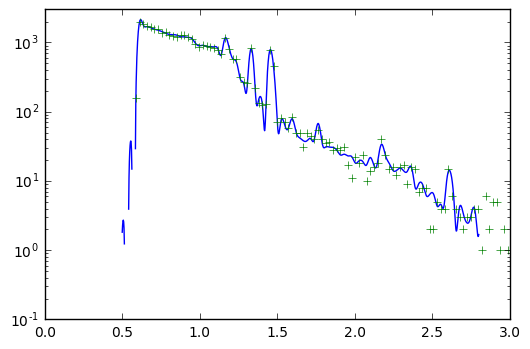

In [182]:
fit.FitLLM(nevslist,tol=1e-8,options={"maxiter":1000})

In [ ]:
y_Co = pdf_Co.
pdf_K = PDF(h_K,interpolation='linear')
pdf_Tl = PDF(h_Tl,interpolation='linear')
pdf_Bi = PDF(h_Bi,interpolation='linear')
pdf_bb2n = PDF(h_bb2n,interpolation='linear')
pdf_testnn = PDF(h_testnn,interpolation='linear')
pdf_total = PDF(h_total,interpolation='linear')

In [ ]:
plt.plot(h_total.bins,h_total.hist)

In [ ]:
h_total.hist

In [ ]:
total.sum()

In [ ]:
plt.plot(E,pdf_Co.pdf(E))

# 

In [65]:
z

     chi2: -1
      fun: -214344.91651895808
 hess_inv: array([[ 83.04704792, -83.04704764,  31.94228893,  48.09766196,
        -18.87290453],
       [-83.04704764,  83.04704778, -31.94228874, -48.09766215,
         18.87290419],
       [ 31.94228893, -31.94228874,  33.9200712 ,  -0.5649148 ,
        -32.25345539],
       [ 48.09766196, -48.09766215,  -0.5649148 ,  46.28131089,  11.6714163 ],
       [-18.87290453,  18.87290419, -32.25345539,  11.6714163 ,
         35.07371931]])
      jac: array([ 0.00195312,  0.        ,  0.00195312, -0.00390625,  0.00390625])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 911
      nit: 86
     njev: 130
   status: 2
  success: False
        x: array([ 18285.44450878,  19966.69298862,    766.95693493,  11352.40091477,
       -13820.53778097])

In [44]:
q = [h_Co, h_K, h_Tl, h_Bi, h_bb2n]
for i in q:
    print(i.hist.sum())

148976.0
79596.0
15221.0
38295.0
11421.0


In [47]:
([ 148975.94529534,   79595.96342355,   15220.7707166 ,
         38295.14100178,   11421.07840777])

[18600, 10600, 1710, 4050, 2000]